In [3]:
import scipy.io as sio
from matplotlib import pyplot as plt
import numpy as np

In [5]:
data = sio.loadmat("RIS_Channels_MIMO.mat")
# data
data = data['H'] # np.ndarray
data

array([[[-3.19068315e-05-5.74172811e-05j,
          1.07905061e-04+8.35176734e-05j,
         -4.78968030e-05-2.83601627e-06j, ...,
         -3.60801415e-05-1.70259621e-05j,
          4.63454838e-05-4.89213217e-05j,
         -2.14437391e-05+4.54374489e-05j],
        [-5.04929267e-05+3.44068584e-05j,
          7.49402530e-05-1.19494793e-04j,
         -1.01590388e-05+5.40476583e-05j, ...,
         -1.34524407e-05+3.67600846e-05j,
         -5.36887851e-05-4.06443815e-05j,
          4.87014497e-05+1.95381934e-05j],
        [ 3.94828427e-05+4.73407735e-05j,
         -1.24999542e-04-6.76888107e-05j,
          4.46730798e-05+6.63711412e-06j, ...,
          3.74237233e-05+9.30211192e-06j,
         -3.42208549e-05+6.08524163e-05j,
          2.00774784e-05-5.03760769e-05j],
        [ 3.93894858e-05-4.47422792e-05j,
         -5.58515413e-05+1.26582798e-04j,
         -8.14752839e-06-4.27722728e-05j, ...,
          4.98878294e-06-3.83018616e-05j,
          6.58122023e-05+2.78469701e-05j,
         -4

In [6]:
train_ratio = 0.8
N = data.shape[2]

idx = np.random.permutation(N)
N_train = int(train_ratio * N)

train_idx = idx[:N_train]
test_idx = idx[N_train:]

data_train = data[:, :, train_idx] # (64, 4, 8000)
data_test = data[:, :, test_idx] # (64, 4, 2000)

train_num = len(data_train)
val_num = len(data_test)
# train_num

data_train

array([[[ 7.07657204e-06+7.26571806e-05j,
          3.45334637e-05+4.05514766e-05j,
         -4.92407962e-05+6.49499026e-05j, ...,
         -3.51855550e-05-7.19108174e-05j,
          3.11663342e-05+3.83638979e-05j,
          2.71845205e-05-5.00549839e-06j],
        [ 7.08253731e-05-1.14684136e-05j,
          3.41288915e-05-4.17379587e-05j,
          8.85280615e-05+2.88571528e-05j, ...,
         -4.69446798e-05+4.61270817e-05j,
          4.33090376e-05-3.46274308e-05j,
         -4.66599970e-06-2.86970533e-05j],
        [-1.70452967e-05-6.71615498e-05j,
         -4.07539162e-05-3.29250603e-05j,
          7.24360104e-06-6.97029708e-05j, ...,
          4.75229159e-05+6.47004742e-05j,
         -4.53039737e-05-4.00289717e-05j,
         -3.14169278e-05+8.86466168e-06j],
        [-6.29460574e-05+2.41693719e-05j,
         -2.58735612e-05+4.83047195e-05j,
         -6.45769972e-05-2.20926678e-05j, ...,
          3.65491163e-05-5.49729762e-05j,
         -2.72234071e-05+4.69353378e-05j,
          1

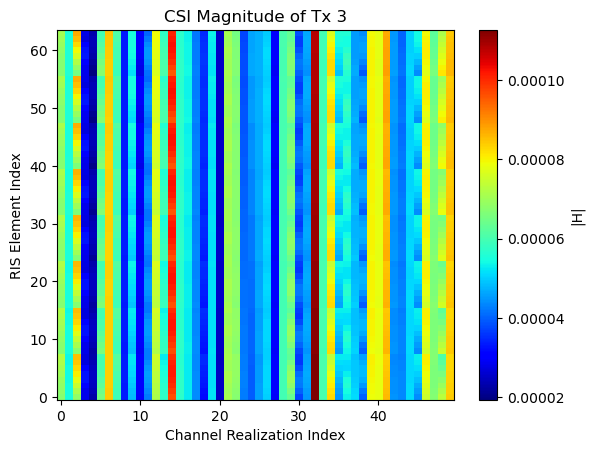

In [7]:
tx = 3
train_abs = np.abs(data_train[:, tx, :50])
plt.imshow(
    train_abs,
    aspect='auto',
    origin='lower',
    cmap='jet'
)
plt.colorbar(label='|H|')
plt.xlabel("Channel Realization Index")
plt.ylabel("RIS Element Index")
plt.title(f"CSI Magnitude of Tx {tx}")
plt.show()

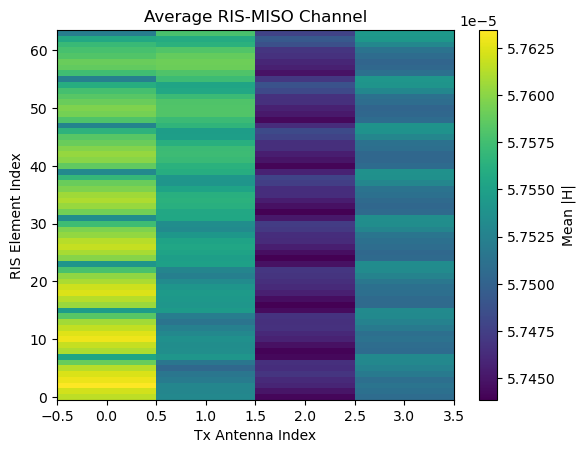

In [9]:
data_abs = np.abs(data_train)
plt.imshow(
    np.mean(data_abs, axis=2),
    aspect='auto',
    origin='lower'
)
plt.colorbar(label='Mean |H|')
plt.xlabel("Tx Antenna Index")
plt.ylabel("RIS Element Index")
plt.title("Average RIS-MISO Channel")
plt.show()


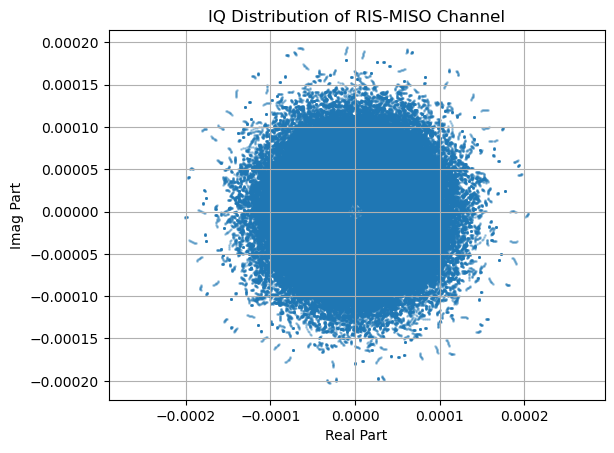

In [10]:
plt.scatter(
    data_train[:, :, :].real.flatten(),
    data_train[:, :, :].imag.flatten(),
    s=1,
    alpha=0.3
)
plt.xlabel("Real Part")
plt.ylabel("Imag Part")
plt.title("IQ Distribution of RIS-MISO Channel")
plt.axis('equal')
plt.grid(True)
plt.show()

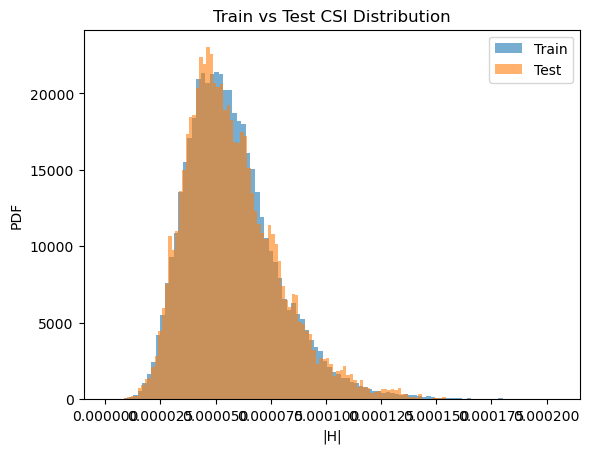

In [11]:
plt.hist(
    np.abs(data_train).flatten(),
    bins=100,
    alpha=0.6,
    label="Train",
    density=True
)
plt.hist(
    np.abs(data_test).flatten(),
    bins=100,
    alpha=0.6,
    label="Test",
    density=True
)

plt.legend()
plt.xlabel("|H|")
plt.ylabel("PDF")
plt.title("Train vs Test CSI Distribution")
plt.show()


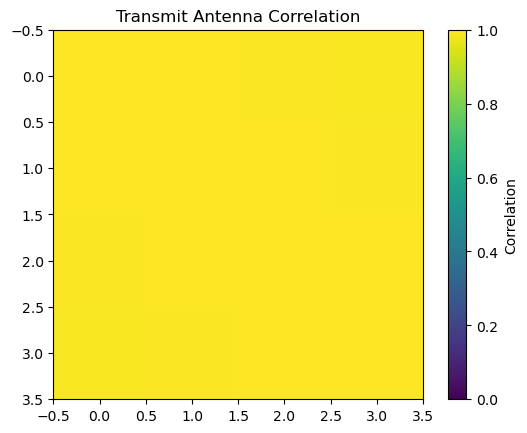

In [12]:
data_tx = data.reshape(64, 4, -1)
corr = np.corrcoef(
    np.abs(data_tx).reshape(4, -1)
)

plt.imshow(corr, vmin=0, vmax=1)
plt.colorbar(label="Correlation")
plt.title("Transmit Antenna Correlation")
plt.show()


In [ ]:
# (64, 4, 10000)
# RIS有64个元素，基站4个接收天线，16个用户设备每个设备一个天线，10000个实例
# 均值化
# 归一化